# 2. Exploratory Data Analysis and Modeling #

## Table of Contents

- [2.1 Identifying Predictors](#2.1-Identifying-Predictors)
    - [2.1.1 Potential Predictors](#2.1.1-Potential-Predictors)
    - [2.1.2 Target Analysis](#2.1.2-Target-Analysis)
    - [2.1.3 Potential Predictors Analysis](#2.1.3-Potential-Predictors-Analysis)
- [2.2 Modeling](#2.2-Modeling)
    - [2.2.1 Multilpe Linear Regression Model](#2.2.1-Multiple-Linear-Regression-Model)
        - [2.2.1.1 Generating First Kaggle Submission](#2.2.1.1-Generating-First-Kaggle-Submission)
    - [2.2.2 Features Power Transformations](#2.2.2-Features-Power-Transformations)
    - [2.2.3 Multiple Linear Regression with Extended Features Matrix](#2.2.3-Multiple-Linear-Regression-with-Extended-Features-Matrix)
    - [2.2.4 Polynomial Features](#2.2.4-Polynomial-Features)
    - [2.2.5 Ridge Regression](#2.2.5-Ridge-Regression)
    - [2.2.6 Lasso Regression](#2.2.6-Lasso-Regression)
    - [2.2.7 ElasticNet Regression](#2.2.7-ElasticNet-Regression)
- [2.3 Evaluations and Conclusions](#2.3-Evaluations-and-Conclusions)
- [2.4 Recommendations](#2.4-Recommendations)

In [1]:
#Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import  cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import  PolynomialFeatures, StandardScaler 

%matplotlib inline

In [2]:
#Setting the notebook display options
pd.set_option('display.max_columns', 5000)
pd.options.display.max_rows = 4000

## 2.1 Identifying Predictors##

### 2.1.1 Potential Predictors ###

In [3]:
#Reading data from a cleant file
df_train = pd.read_csv('../datasets/train_clean.csv')
df_train.shape

(2048, 94)

In [4]:
#Checking data types
df_train.dtypes

Unnamed: 0                int64
1st flr sf                int64
2nd flr sf                int64
bedroom abvgr             int64
bldg type                 int64
bsmt full bath          float64
bsmt half bath          float64
central air               int64
condition 1               int64
condition 2               int64
electrical                int64
enclosed porch            int64
exter cond                int64
exter qual                int64
exterior 1st              int64
exterior 2nd              int64
fireplaces                int64
full bath                 int64
functional                int64
garage cars             float64
gr liv area               int64
half bath                 int64
heating                   int64
heating qc                int64
id                        int64
kitchen abvgr             int64
kitchen qual              int64
land contour             object
land slope                int64
lot area                  int64
lot config               object
lot shap

In [5]:
#Correlation values for our existing columns to the target column "saleprice"
print(df_train.corr()['saleprice'].sort_values(ascending=False))

saleprice               1.000000
overall qual            0.800975
gr liv area             0.698046
garage cars             0.648103
total bsmt sf           0.631507
1st flr sf              0.621181
baths                   0.608846
year built              0.572256
overall                 0.565254
year remod/add          0.550055
full bath               0.537369
foundation_pconc        0.530973
totrms abvgrd           0.502909
fireplaces              0.470091
outside area            0.458514
neighborhood_nridght    0.449007
open porch sf           0.332090
wood deck sf            0.327007
lot area                0.295121
bsmt full bath          0.283564
half bath               0.282023
neighborhood_noridge    0.263598
neighborhood_stonebr    0.257176
2nd flr sf              0.249091
house style_2story      0.202542
exter_net_quality       0.174108
exter cond              0.163862
heating qc              0.157710
kitchen qual            0.155038
neighborhood_somerst    0.150167
bedroom ab

In [6]:
#Identifying target columns for my model
#The main idea behind this is that I am planning on using the categories(columns) with 
# absolute correlation value above 0.2 
df1 = df_train.corr()[['saleprice']][abs(df_train.corr()['saleprice']) > .2]

In [7]:
#Getting column names as indices for df1 data frame
ls = list(df1.index)
ls.sort()

#We definitely don't want our target be among our predictors, hence dropping it from the list of potential predictors
ls.remove('saleprice')
ls

['1st flr sf',
 '2nd flr sf',
 'baths',
 'bsmt full bath',
 'central air',
 'electrical',
 'fireplaces',
 'foundation_cblock',
 'foundation_pconc',
 'full bath',
 'garage cars',
 'gr liv area',
 'half bath',
 'house style_2story',
 'lot area',
 'neighborhood_noridge',
 'neighborhood_nridght',
 'neighborhood_oldtown',
 'neighborhood_stonebr',
 'open porch sf',
 'outside area',
 'overall',
 'overall qual',
 'paved drive',
 'total bsmt sf',
 'totrms abvgrd',
 'wood deck sf',
 'year built',
 'year remod/add']

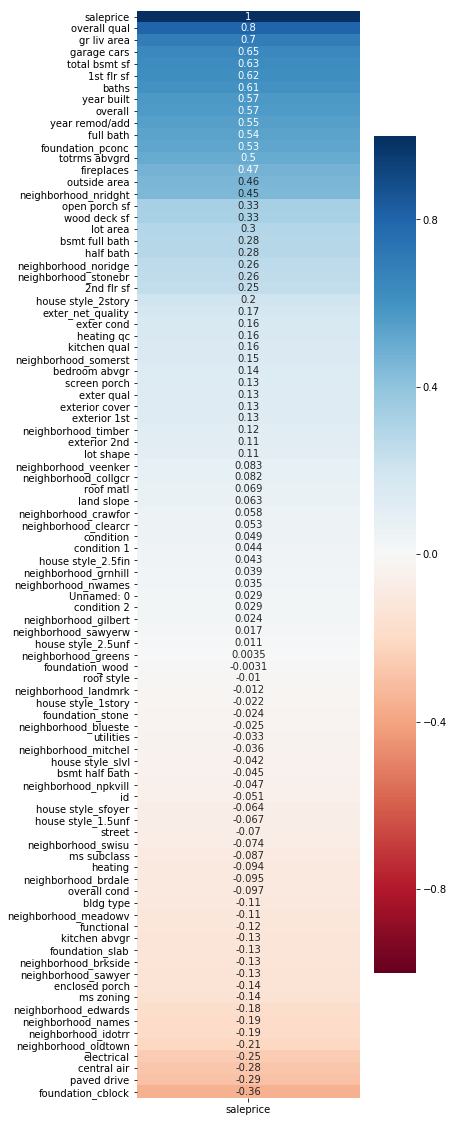

In [8]:
#Vizulalizing heatmap
plt.figure(figsize = (5,20))
sns.heatmap(df_train.corr()[['saleprice']].sort_values('saleprice',ascending=False), annot=True,  cmap = 'RdBu', vmin = -1, vmax = 1);

### 2.1.2 Target Analysis ###

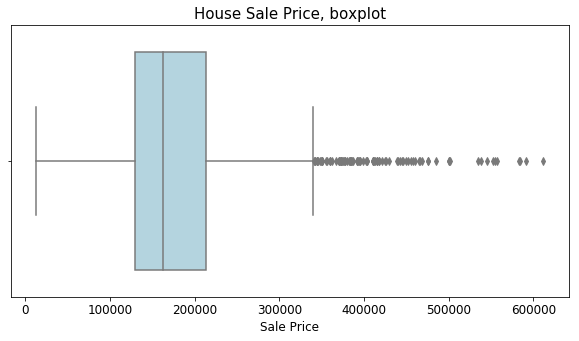

In [9]:
#Boxplot of 'salesprice' category to identify outliers.
#We could see that values after salesprice=350_000 are outliers
plt.figure(figsize = (10,5))
sns.boxplot(df_train['saleprice'], color = 'lightblue');
plt.title('House Sale Price, boxplot', fontsize = 15)
plt.xlabel('Sale Price', fontsize=12)
plt.xticks(fontsize=12);

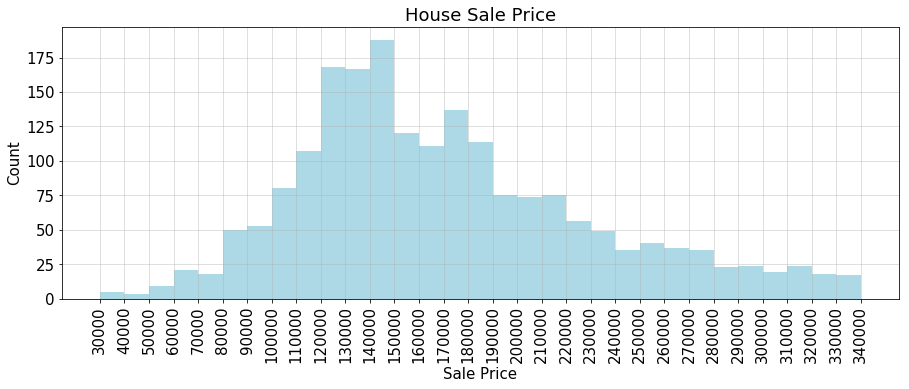

In [10]:
#Saleprice histogram 
x_min = 30_000
x_max = 350_000
x_steps = 10_000
x_range = list(range(x_min, x_max, x_steps))

plt.figure(figsize = (15,5))
plt.hist(df_train['saleprice'], color = 'lightblue', bins = x_range);
plt.title('House Sale Price', fontsize = 18)
plt.xlabel('Sale Price', fontsize=15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(ticks = x_range, fontsize=15, rotation = 90)
plt.yticks(fontsize=15)
plt.grid( alpha =0.5);


In [11]:
#Bottom outliers
mask1 = df_train['saleprice'] < 30_000
df_train[mask1]['saleprice'].describe()

count        2.000000
mean     12944.500000
std        219.910209
min      12789.000000
25%      12866.750000
50%      12944.500000
75%      13022.250000
max      13100.000000
Name: saleprice, dtype: float64

In [12]:
#Top outliers
mask2 = df_train['saleprice'] >350_000
df_train[mask2]['saleprice'].describe()

count        81.000000
mean     428724.543210
std       63839.847703
min      355000.000000
25%      380000.000000
50%      410000.000000
75%      457347.000000
max      611657.000000
Name: saleprice, dtype: float64

In [13]:
#Dropping outliers
df_train = df_train[~(mask1 | mask2)]

### 2.1.3 Potential Predictors Analysis ##

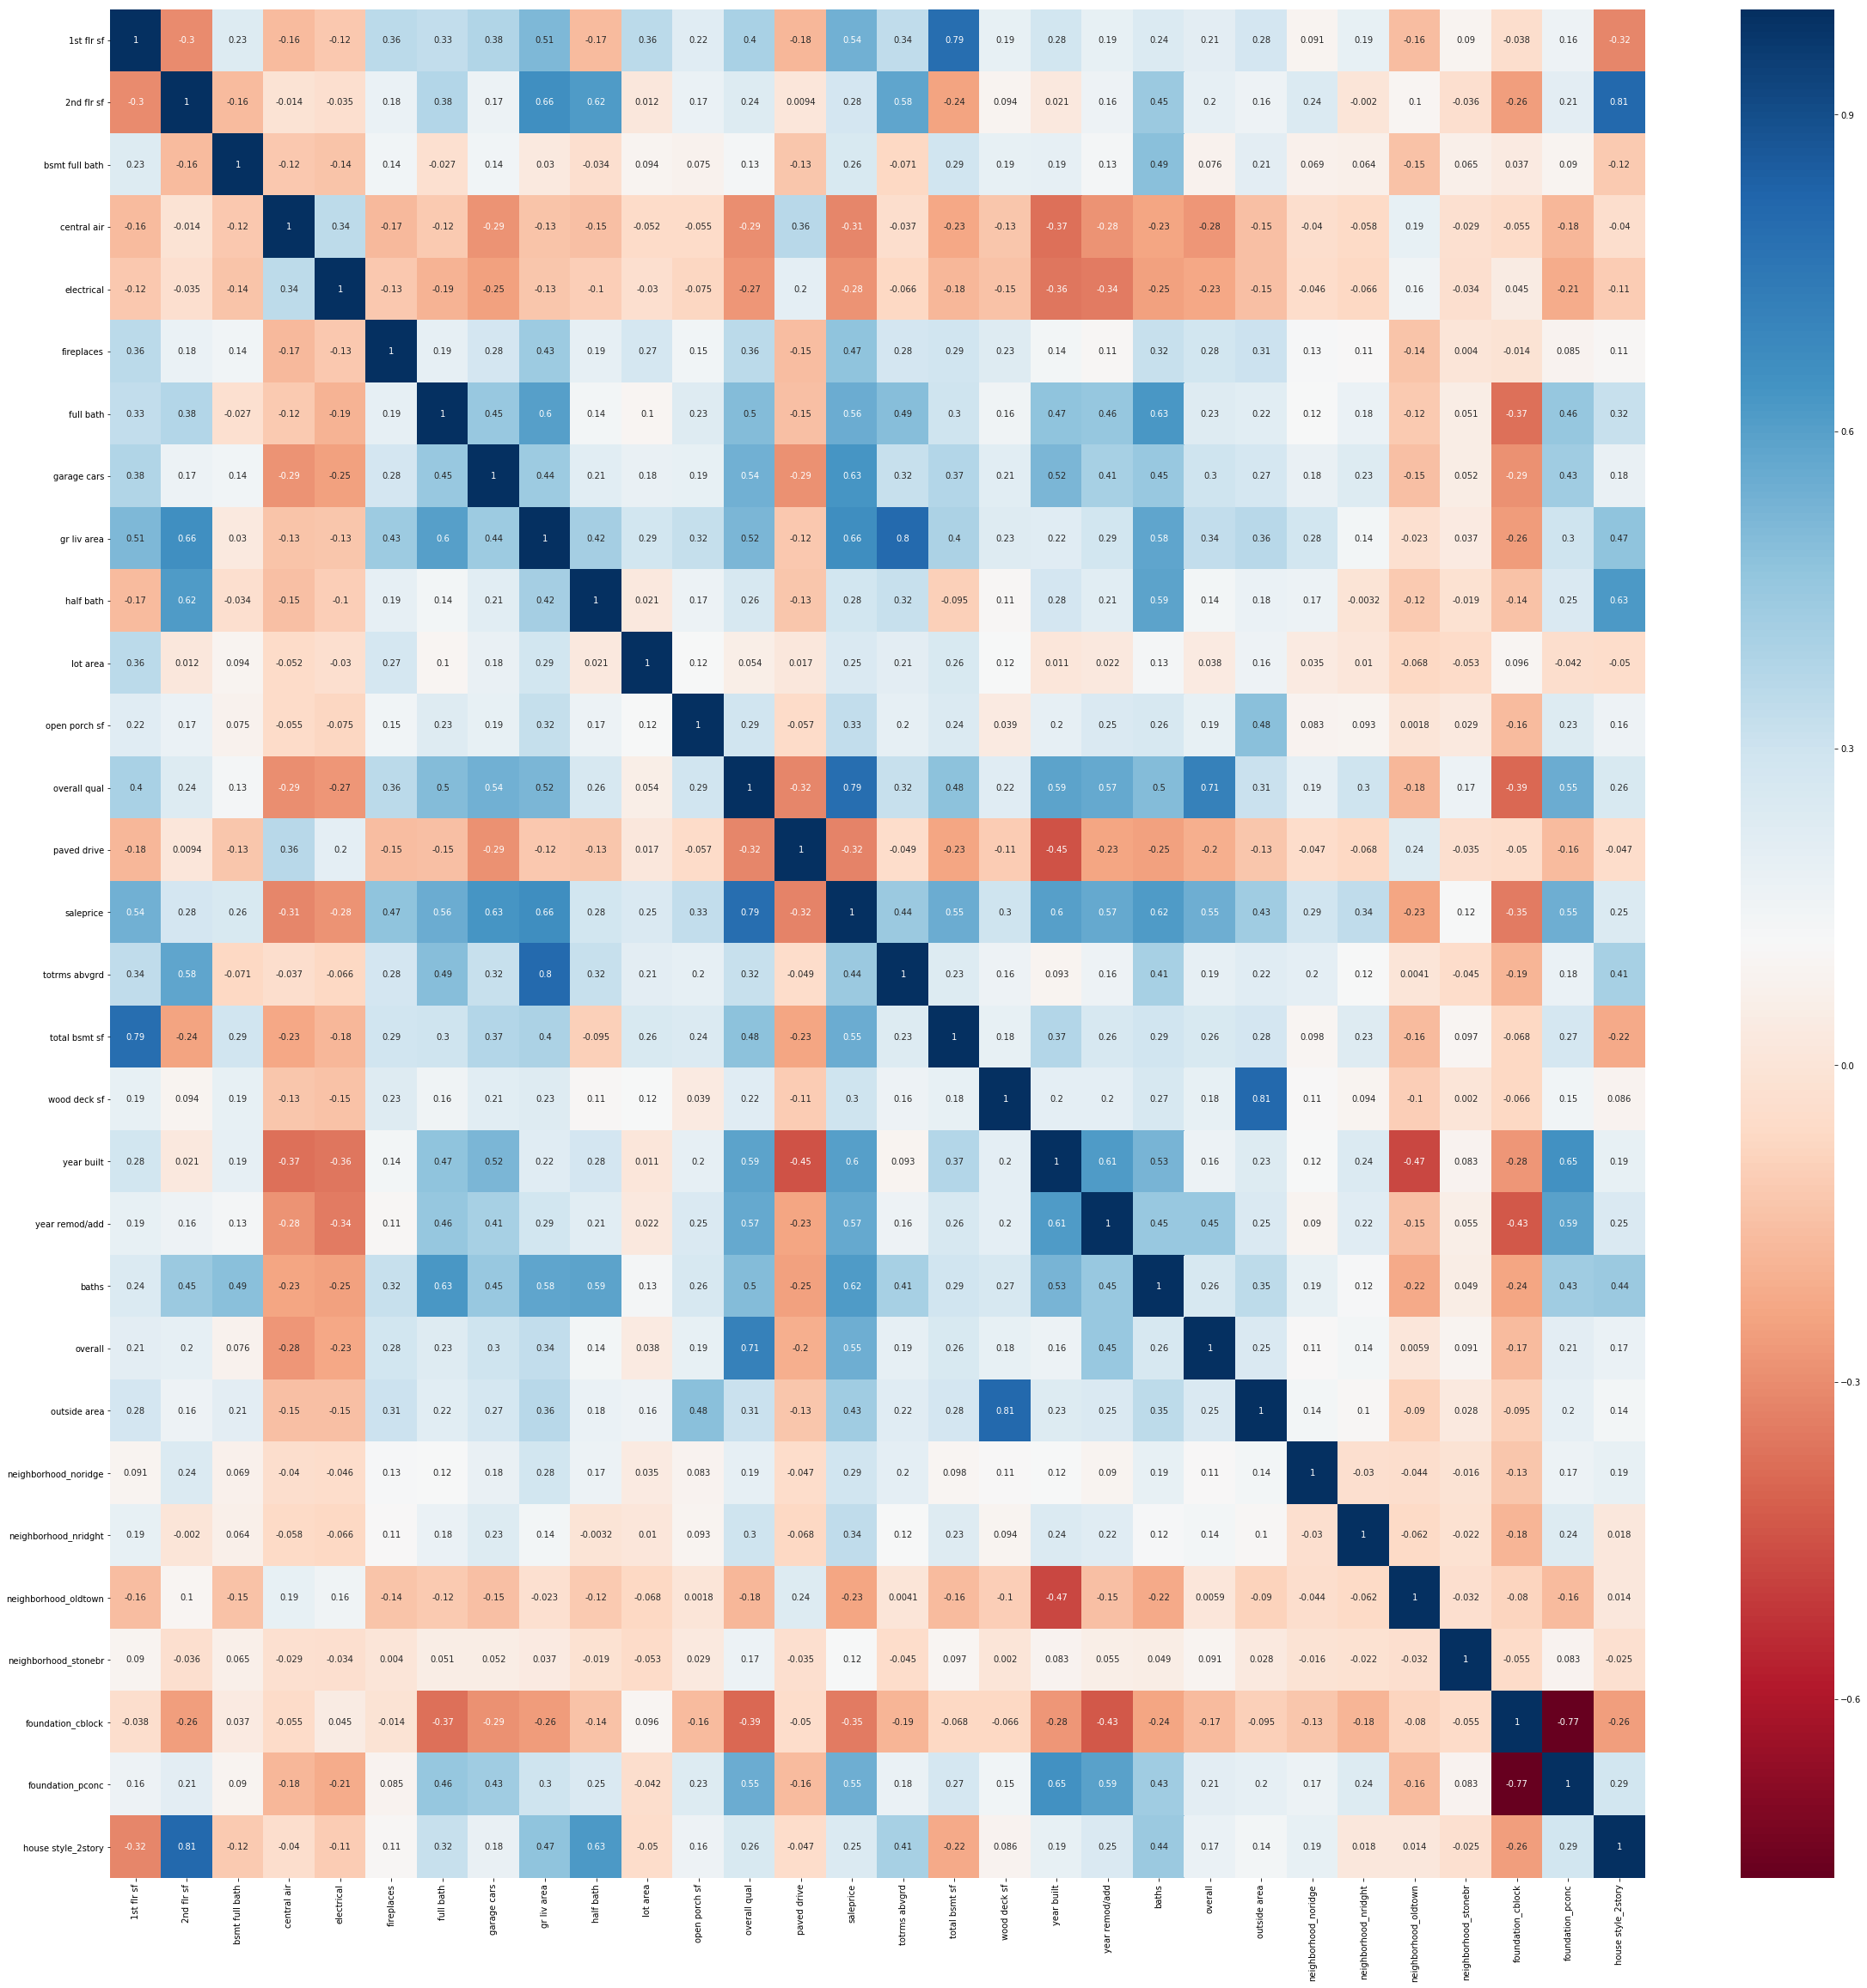

In [14]:
## Plotting correlation heatmap for our data
plt.figure(figsize = (40,40))
hm = sns.heatmap(df_train[df1.index].corr(),
                 cbar=True,
                 cmap = 'RdBu',
                 annot=True)

#That's a very large and detailed matrix, but we could see a number of dark-colored non-diagonal positions,
#indicating strong dependencies between variables

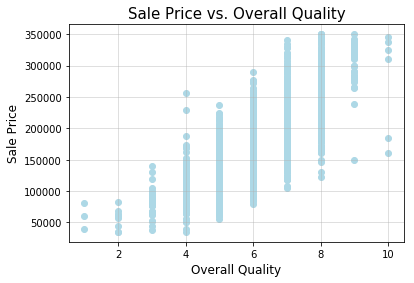

In [15]:
#Creating a scatter plot of the predictors with highest correlation to our target
plt.scatter(df_train['overall qual'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Overall Quality', fontsize = 15)
plt.xlabel('Overall Quality', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#Since our 'Overall Qual' is discrete, a scatter plot is disctrete, too. It shows a patters resembling quadratic(?)

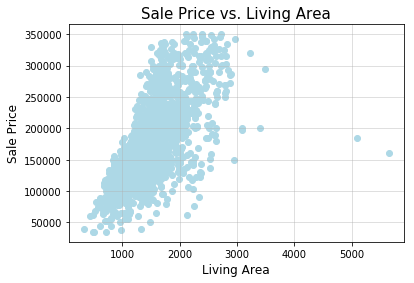

In [16]:
#Creating a scatter plot of the predictors with highest correlation to our target
plt.scatter(df_train['gr liv area'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Living Area', fontsize = 15)
plt.xlabel('Living Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#Observation - strong linear pattern with a couple of serious outliers and quadratic pattern

In [17]:
#Dropping outliers above 5_000 sq feet - huge houses
df_train = df_train[df_train['gr liv area'] < 3_000]

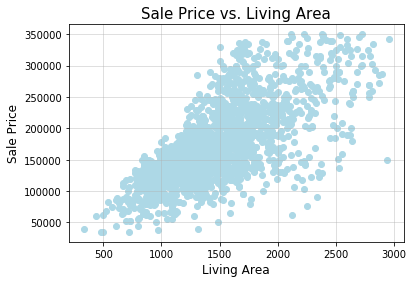

In [18]:
#Creating a scatter plot of the predictor with highest correlation to our target after having dropped the outliers
plt.scatter(df_train['gr liv area'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Living Area', fontsize = 15)
plt.xlabel('Living Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#Clear quadratic pattern with no distinct outliers

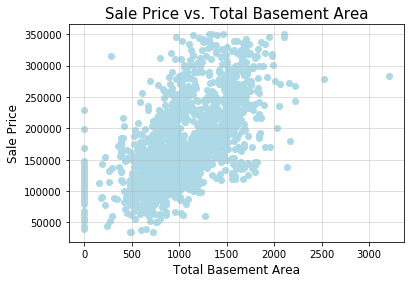

In [19]:
#"Total basement square footage" vs "Sale Price"
plt.scatter(df_train['total bsmt sf'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Total Basement Area', fontsize = 15)
plt.xlabel('Total Basement Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#Even stronger quadratic pattern with 1-2 outliers >2_500 sq_ft
df_train = df_train[df_train['total bsmt sf'] < 2_500]

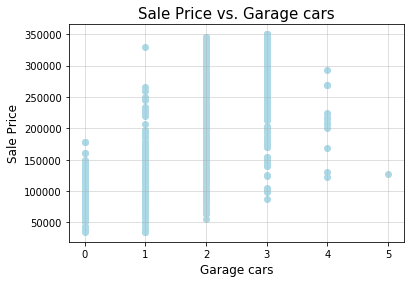

In [20]:
#"Garage cars" vs "Sale Price"
plt.scatter(df_train['garage cars'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Garage cars', fontsize = 15)
plt.xlabel('Garage cars', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#Not a distinct pattern

>**Column 'overall' is engineered while cleaning the data using 'Overall Qual' and 'Overall Cond' columns and has lower correlation to 'Sale Price' in compariston with a parent column 'Overall Qual' - hence, I'm excluding it from the analysis and removing it from the list of possible features**

In [21]:
#Removing a feature
ls.remove('overall')

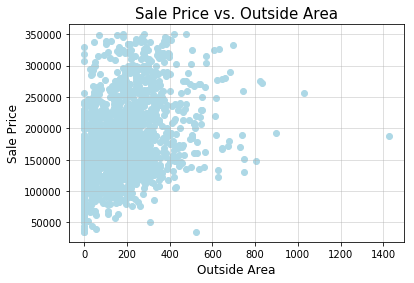

In [22]:
#"Outside area" vs "Sale Price"
plt.scatter(df_train['outside area'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Outside Area', fontsize = 15)
plt.xlabel('Outside Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#No distinct pattern with outliers outside area > 850
df_train = df_train[df_train['outside area'] < 800]

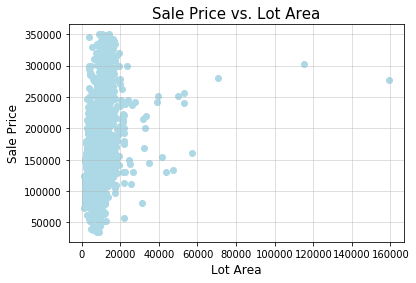

In [23]:
#"Lot area" vs "Sale Price"
plt.scatter(df_train['lot area'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Lot Area', fontsize = 15)
plt.xlabel('Lot Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

In [24]:
#Clear strong exp(4) pattern with outliers outside area > 60_000
df_train = df_train[df_train['lot area'] < 60_000]

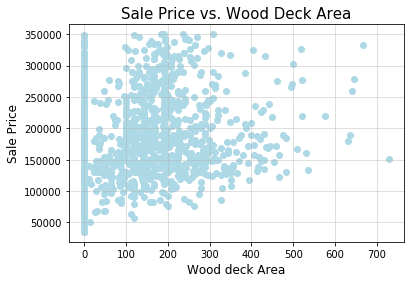

In [25]:
#"Wood deck sf" vs "Sale Price"
plt.scatter(df_train['wood deck sf'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Wood Deck Area', fontsize = 15)
plt.xlabel('Wood deck Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#No definite pattern 

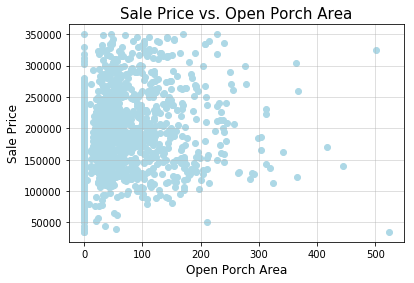

In [26]:
#"Open Porch" vs "Sale Price"
plt.scatter(df_train['open porch sf'], df_train['saleprice'], color = 'lightblue');
plt.title('Sale Price vs. Open Porch Area', fontsize = 15)
plt.xlabel('Open Porch Area', fontsize = 12)
plt.ylabel('Sale Price', fontsize = 12);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);
plt.grid( alpha =0.5);

#No distinct pattern

**Let's once again look at our list of possible features (absolute correlation with saleprice more than 0.2 ):**

In [27]:
ls

['1st flr sf',
 '2nd flr sf',
 'baths',
 'bsmt full bath',
 'central air',
 'electrical',
 'fireplaces',
 'foundation_cblock',
 'foundation_pconc',
 'full bath',
 'garage cars',
 'gr liv area',
 'half bath',
 'house style_2story',
 'lot area',
 'neighborhood_noridge',
 'neighborhood_nridght',
 'neighborhood_oldtown',
 'neighborhood_stonebr',
 'open porch sf',
 'outside area',
 'overall qual',
 'paved drive',
 'total bsmt sf',
 'totrms abvgrd',
 'wood deck sf',
 'year built',
 'year remod/add']

**We could notice from the correlation heatmap that some of columns in this list have quite strong mutual correlation. Hence, we are keeping the strongest-correlated with our target one and dropping the rest in order to avoid multi-collinearity issues.**

In [28]:
#Dropping potential predictors
ls.remove('1st flr sf')
ls.remove('2nd flr sf')
ls.remove('total bsmt sf')
ls.remove('year remod/add')
ls.remove('full bath')
ls.remove('foundation_cblock')
ls.remove('bsmt full bath')
ls.remove('half bath')
ls.remove('totrms abvgrd') 
ls.remove('house style_2story')
ls.remove('neighborhood_oldtown')
ls.remove('wood deck sf')
ls.remove('foundation_pconc')
ls.remove('garage cars')
ls.remove('year built')
ls.remove('baths')
ls.remove('overall qual')

In [29]:
#here's a list of columns each having no more than 0.5 correlation with each other
ls

['central air',
 'electrical',
 'fireplaces',
 'gr liv area',
 'lot area',
 'neighborhood_noridge',
 'neighborhood_nridght',
 'neighborhood_stonebr',
 'open porch sf',
 'outside area',
 'paved drive']

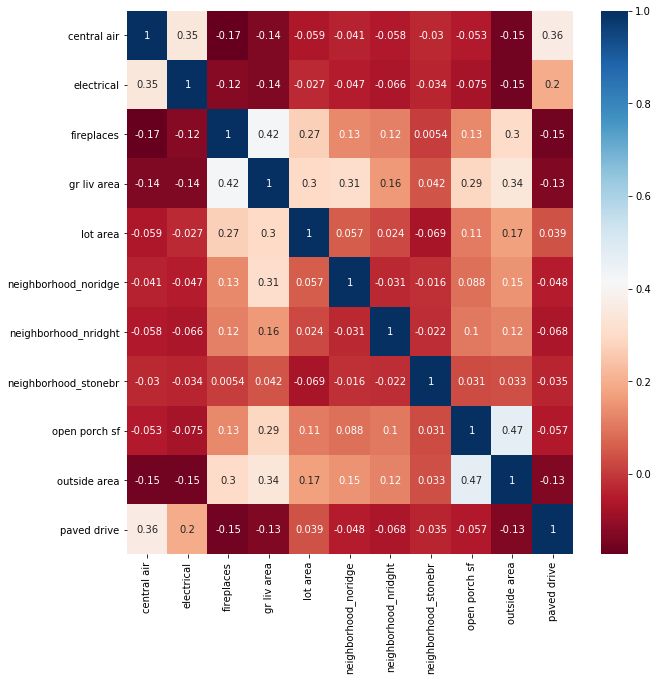

In [30]:
#Correlation heatmap
plt.figure(figsize = (10,10))
hm = sns.heatmap(df_train[ls].corr(),
                 cbar=True,
                 cmap = 'RdBu',
                 annot=True)

#This map doesn't show us any correlations exceeding 0.5 by value, so we could try using
#this set of featutres for modeling

In [59]:
#List of features for the future model - renamed for future coherence
features = ls

## 2.2 Modeling ##

### 2.2.1 Multiple Linear Regression Model ###

In [32]:
#Initializing a linear regression model
lr = LinearRegression()

In [33]:
#Shape of our training model
df_train.shape

#NB: We still have quite enough data to proceed with modeling, even though we have dropped some outliers

(1947, 94)

In [34]:
#List of initial model features
features.append('id')

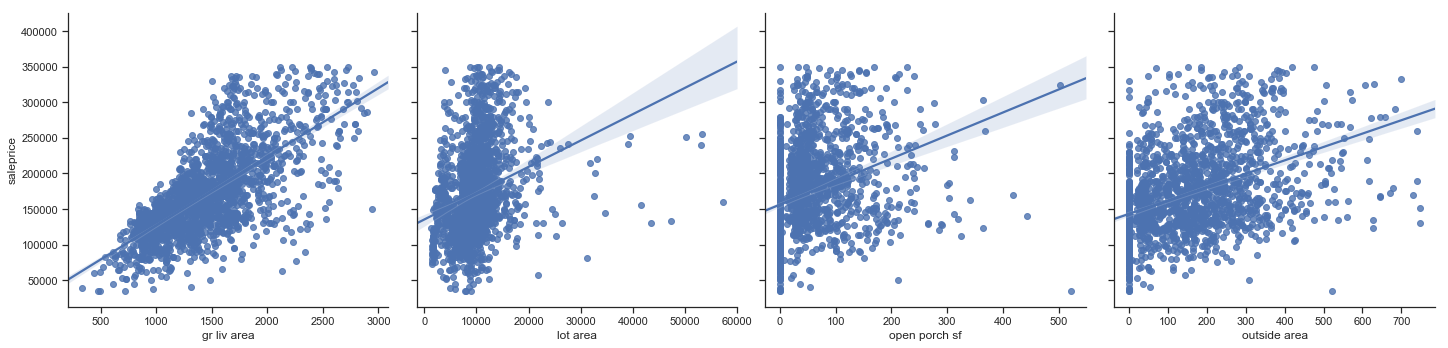

In [35]:
#Pair plot for model's numeric features vs target
sns.set(style="ticks", color_codes=True)
sns.pairplot(data = df_train,
             x_vars = ['gr liv area', 'lot area', 'open porch sf', 'outside area'], 
             y_vars = ['saleprice'],
             kind = 'reg',
             height = 5);

In [36]:
#Features matrix
X = df_train[features]
y = df_train['saleprice']

In [37]:
#Fitting the linear regression model
lr.fit(X,y)

#Getting model's coefficients
lr.coef_

array([-2.33341204e+04, -1.96518372e+04,  1.19711512e+04,  6.04739778e+01,
        1.13889390e+00,  4.81048089e+04,  6.74390943e+04,  5.43931603e+04,
        7.84267047e+01,  4.43272295e+01, -3.23072644e+04,  1.56983659e-01])

In [38]:
#getting model's intercept
lr.intercept_

57276.457072472986

In [39]:
#Getting predictions on a training set
pred = lr.predict(X)

In [40]:
#Getting residuals
residuals = y - pred

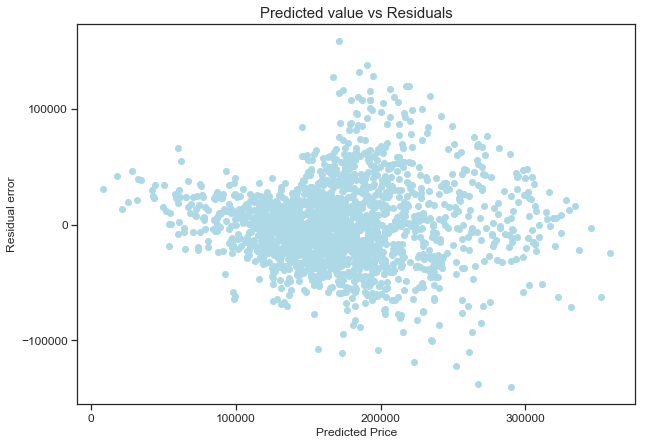

In [62]:
#Residuals' scatterplot
plt.figure(figsize = (10,7))
plt.scatter(pred, residuals, color = 'lightblue');
plt.title('Predicted value vs Residuals', fontsize = 15)
plt.xlabel('Predicted Price', fontsize = 12)
plt.ylabel('Residual error', fontsize = 12);
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

In [42]:
#Model's cross-validation score on training data set
cross_val_score(lr,X,y, cv=5).mean()

0.6743284718224907

- **The cross-validation R2-score is quite low. Let's try increasing it by using some power transformations, and also by increasing the rang of the model.**

- **Also, from the residuals scatterplot we can notice that their distribution has some complex pattern  and is definitely not normal, relating with multicolinearities among the predictors**

### _2.2.1.1 Generating First Kaggle Submission_ ###

In [43]:
#Getting test data
df_test = pd.read_csv('../datasets/test_clean.csv')

In [44]:
#Checking the difference between training and testing data
set(df_train.columns) - set(df_test.columns)

{'saleprice'}

In [45]:
#Testing features matrix
X_test = df_test[features]

#Predicting target value on testing data
X_test['saleprice'] = lr.predict(X_test)

#preparing Kaggle submission
X_kaggle = X_test
X_kaggle.set_index('id', inplace=True)
output = X_kaggle[['saleprice']]
output.to_csv('../datasets/Tue_3_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,saleprice
count,879.000000
mean,177355.929356
std,58107.944798
min,29363.658317
25%,137043.708804
50%,169669.484232
75%,204597.231603
max,457087.440044


> **At first glance, this prediction looks quite legit**

## 2.2.2 Features Power Transformations##

In [46]:
#Creating a copy of training data

df_train_transform = df_train

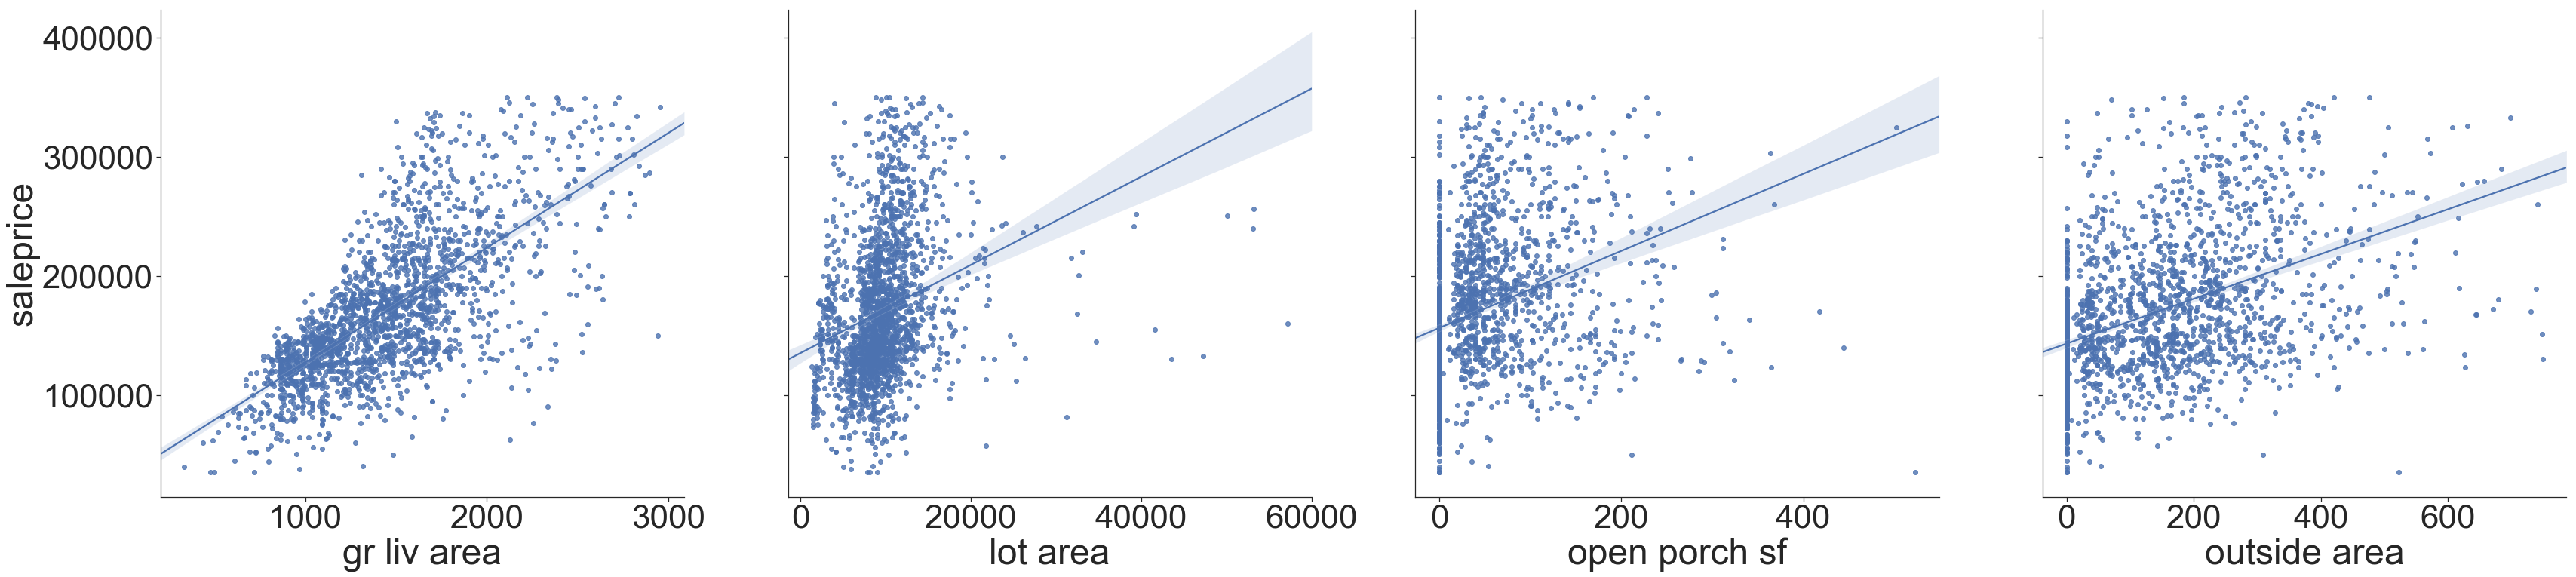

In [47]:
#Pair plot for model's numeric features vs target
sns.set(style="ticks", color_codes=True, font_scale=4)
sns.pairplot(df_train, x_vars = ['gr liv area', 'lot area', 'open porch sf', 'outside area'], 
             y_vars = ['saleprice'],
            kind = 'reg',
             height =12,
            );

> **These scatter plots of numeric features vs our target show that we could probably do the following transformations:**

In [48]:
#Reversing 2nd power of 'Gr liv area' into the model
# Reversing 2 - powers of 'Lot area' into the model
#Reversing 2nd power of 'Open porch' into the model
#reversing 2nd power of 'Outside area' into the model

df_train_transform['gr liv area'] = df_train_transform['gr liv area'].map(lambda x: np.sqrt(x))
df_train_transform['lot area'] = df_train_transform['lot area'].map(lambda x: np.sqrt(x))
df_train_transform['open porch sf'] = df_train_transform['open porch sf'].map(lambda x: np.sqrt(x))
df_train_transform['outside area'] = df_train_transform['outside area'].map(lambda x: np.sqrt(x))

In [49]:
#Features matrix
X = df_train_transform[features]

#Target vector
y = df_train_transform['saleprice']

In [50]:
#Initializing new linear regression model and fitting it 
lr_sqrt = LinearRegression()
lr_sqrt.fit(X,y)

#Cross-validating model's R2-score
cross_val_score(lr_sqrt,X,y, cv=5).mean()

0.6912138119722872

**_R2-score has improved, but not much_**

In [51]:
# Reversing 3 - powers of 'Lot area' into the model
df_train_transform['lot area'] = df_train['lot area'].map(lambda x: x**.33)

In [52]:
#New linear regression model and it's cross-validation
X = df_train_transform[features]
y = df_train_transform['saleprice']
lr_1_3 = LinearRegression()
lr_1_3.fit(X,y)
cross_val_score(lr_1_3,X,y, cv=5).mean()

0.6928600876180943

**_R2-score has improved, but not much_**

In [53]:
# Reversing 4 - powers of 'Lot area' into the model
df_train_transform['lot area'] = df_train['lot area'].map(lambda x: x**.25)

In [54]:
#New linear regression model initialization and cross-validation
X = df_train_transform[features]
y = df_train_transform['saleprice']
lr_1_4 = LinearRegression()
lr_1_4.fit(X,y)
cross_val_score(lr_1_4,X,y, cv=5).mean()

0.6932413458749497

**_R2-score has improved, but not much_**

In [55]:
# Reversing 10 - powers of 'Lot area' into the model
df_train_transform['lot area'] = df_train['lot area'].map(lambda x: x**.1)
X = df_train_transform[features]
y = df_train_transform['saleprice']
lr_1_10 = LinearRegression()
lr_1_10.fit(X,y)
cross_val_score(lr_1_10,X,y, cv=5).mean()

0.6933328491388558

> ### **Conclusion: reversing powers beyond 2 power doesn't really give any significant improvement**

> Another idea I'd like to explore for possible improvement is fitting the model with originally dropped in order to avoid to much of multi-collinearity predictors

## 2.2.3 Multiple Linear Regression with Extended Features Matrix##

In [56]:
# Taking all the original columns with absolute correlation with "Sale Price" more than 0.2
ls_1 = list(df1.index)
ls_1.remove('saleprice')
ls_1.append('id')

#Fitting a new model and getting it's cross-validater R2-score
X = df_train[ls_1]
y = df_train['saleprice']
lr_1_x = LinearRegression()
lr_1_x.fit(X,y)
cross_val_score(lr_1_x, X, y, cv=5).mean()

0.8762053024037517

In [57]:
lr_1_x.predict(X)

array([176186.36600312, 233734.47719534, 138391.55487917, ...,
       159367.64132071, 138712.00159371, 206856.38995442])

**Cross-validated R2-score has significantly improved**

In [63]:
#Trying to use this model for Kaggle submission
X_test_x = df_test[ls_1]
X_test_x['saleprice'] = lr_1_x.predict(X_test_x)
X_kaggle_x = X_test_x
X_kaggle_x.set_index('id', inplace=True)
output = X_kaggle_x[['saleprice']]
output.to_csv('../datasets/Tue_4_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,saleprice
count,8.790000e+02
mean,3.740315e+10
std,3.634590e+10
min,5.338777e+09
25%,2.639700e+10
50%,3.419107e+10
75%,4.198124e+10
max,7.786382e+11


>**This is an awful prediction, making no sense, confirming that with too many collinear predictors our model becomes overfit and gets very high variance (Kaggle score is horrible, as one can guess judging by the order of predictions**

## 2.2.4 Polynomial Features ##

**Another way to improve model performance is to try using polynomial regression**

In [64]:
#Features for polynomial model
features_poly = features

#Features matrix
X_1 = df_train[features_poly]

#Initializing model with default 2 power polynomes 

poly = PolynomialFeatures(degree = 2,include_bias=False)
X_poly = poly.fit_transform(X_1)

#Getting a cross validates R2-score for our Linear Regression model with polynomial features
cross_val_score(lr_1_x, X_poly, y, cv=5).mean()

0.7127804066150387

In [65]:
#Trying to use polynomial transformation on our initial model with correlations to price more that .2
X_x = df_train[ls_1]
poly_x = PolynomialFeatures(degree = 2,include_bias=False)

#Fitting our polynomial LR model with trianing data set and cross-validating it
X_poly_x = poly_x.fit_transform(X_x)
cross_val_score(lr_1_x, X_poly_x, y, cv=5).mean()

0.8068095688113599

**As we could notice, model's cross-validated R2-score has improved, but it's a bit lower than when using a model with many collinear predictors**

In [66]:
#Using this model to get predictions for Kaggle, as so far the model with
#extended features (correlations to price more that .2) has the best R2-score
X_test_x = df_test[ls_1]
X_test_poly_x = poly_x.fit_transform(X_test_x)
lr_1_x.fit(X_poly_x,y)

X_test_x['saleprice'] = lr_1_x.predict(X_test_poly_x)
X_kaggle_x = X_test_x
X_kaggle_x.set_index('id', inplace=True)
output = X_kaggle_x[['saleprice']]
output.to_csv('../datasets/Tue_5_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,saleprice
count,8.790000e+02
mean,-7.519396e+15
std,6.557586e+16
min,-1.675045e+18
25%,-4.879226e+15
50%,-3.239321e+15
75%,-1.932702e+15
max,-7.924534e+13


>**As we could see, our cross-validated R2 score is much lower when polynomial features are used, but it does increase when we use more parameters. Meanwhile, trying to predict test set target value gives us nonsense results.**

## 2.2.5 Ridge Regression ##

**Let's try Ridge regression on the model with the multitude of parameters with at least 0.2 correlation with the target** 

In [67]:
#Re-defining our features 
ridge_features = list((df_train.corr()[['saleprice']][abs(df_train.corr()['saleprice']) > .2]).index)
ridge_features.append('id')

In [68]:
ridge_features.remove('saleprice')

In [69]:
df_train.columns

Index(['Unnamed: 0', '1st flr sf', '2nd flr sf', 'bedroom abvgr', 'bldg type',
       'bsmt full bath', 'bsmt half bath', 'central air', 'condition 1',
       'condition 2', 'electrical', 'enclosed porch', 'exter cond',
       'exter qual', 'exterior 1st', 'exterior 2nd', 'fireplaces', 'full bath',
       'functional', 'garage cars', 'gr liv area', 'half bath', 'heating',
       'heating qc', 'id', 'kitchen abvgr', 'kitchen qual', 'land contour',
       'land slope', 'lot area', 'lot config', 'lot shape', 'ms subclass',
       'ms zoning', 'open porch sf', 'overall cond', 'overall qual',
       'paved drive', 'roof matl', 'roof style', 'saleprice', 'screen porch',
       'street', 'totrms abvgrd', 'total bsmt sf', 'utilities', 'wood deck sf',
       'year built', 'year remod/add', 'baths', 'overall', 'outside area',
       'condition', 'exter_net_quality', 'exterior cover',
       'neighborhood_blueste', 'neighborhood_brdale', 'neighborhood_brkside',
       'neighborhood_clearcr', 'nei

In [70]:
#Features matrices
X_train = df_train[ridge_features]
X_test = df_test[ridge_features]

#Target vector
y_train = df_train['saleprice']

#Initializing StandardScaler
ss = StandardScaler()

#Scaling our inputs

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

#Initializing ridge model
ridge = Ridge()

#Fitting ridge model
ridge_model = ridge.fit(X_train_sc, y_train)

#Getting R2-score for our ridge model
ridge_model.score(X_train_sc, y_train)

0.8862212851259501

> **So far, it's the bext cross-validated R2 score!**

In [71]:
#getting Kaggle predictions using Ridge model
X_test['saleprice'] = ridge_model.predict(X_test_sc)
X_kaggle_ridge = X_test
X_kaggle_ridge.set_index('id', inplace=True)
output = X_kaggle_ridge[['saleprice']]
output.to_csv('../datasets/Wed_ridge_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,saleprice
count,879.000000
mean,170836.852594
std,59893.979036
min,35468.255801
25%,126390.152978
50%,162715.475099
75%,207389.925915
max,435352.076348


> Kaggle submission, generated by this model, looks legit but isn't great in terms of leaderboard advancement

In [72]:
#Setting a list of alphas to optimize our Ridge model 
r_alphas = np.logspace(0,1,10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas = r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha
ridge_cv.fit(X_train_sc, y_train)

#Getting R2-score for our best model
ridge_cv.score(X_train_sc, y_train)

0.8861997408777444

In [73]:
#Getting the optimized value of regularization strength
ridge_cv.alpha_

2.154434690031884

> Apparently, the default alpha = 1.0 worked a bit better

In [74]:
#getting Kaggle predictions using Ridge model
X_test['saleprice'] = ridge_cv.predict(X_test_sc)
X_kaggle_ridge_cv = X_test
# X_kaggle_ridge.set_index('id', inplace=True)
output = X_kaggle_ridge_cv[['saleprice']]
output.to_csv('../datasets/Wed_ridge_cv_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,saleprice
count,879.000000
mean,170836.852594
std,59806.543787
min,35727.712228
25%,126453.223474
50%,162678.786141
75%,207340.798407
max,434576.872824


> Kaggle submission generated by this model wasn't entirely great, even though it's aggregated RMSE was smaller

## 2.2.6 Lasso Regression ##

In [75]:
#Initializing a Lasso model
lasso = Lasso()

#Fitting Lasso model
lasso_model = lasso.fit(X_train_sc, y_train)

#Getting R2-score for our lasso model
lasso_score = lasso_model.score(X_train_sc, y_train)
lasso_score

0.8862282042918339

> This R2 score is a bit better than Ridge, but the difference starts at 10e-7, which is barely a significant improvement

In [77]:
# Set up a list of Lasso alphas to check in order to try optimizing our Lasso model
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas = l_alphas, cv=5, max_iter=5_000)

#Fitting Lasso model
lasso_model_cv = lasso_cv.fit(X_train_sc, y_train)

#Getting R2-score for our lasso model
lasso_model_cv.score(X_train_sc, y_train)

0.8862282042918339

In [81]:
#Getting the optimal regularization parameter for Lasso model
lasso_model.alpha

1.0

> Apparently, an optimized R2-score for Lasso model matches the un-optimized one with alpha=1.0

In [82]:
#getting Kaggle predictions using Lasso model
X_test['saleprice'] = lasso_model.predict(X_test_sc)
X_kaggle_lasso = X_test
output = X_kaggle_lasso[['saleprice']]
output.to_csv('../datasets/Wed_lasso_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,saleprice
count,879.000000
mean,170836.852594
std,59967.650557
min,35229.020424
25%,126366.368132
50%,162591.979922
75%,207647.040590
max,436033.127149


> Kaggle submission looks legit, but it's result is far from ideal :)

## 2.2.7 ElasticNet Regression ##

In [84]:
# Set up a list of alphas to check.
enet_alphas = np.linspace(0.5, 1.0, 100)

# Set up our l1 ratio.
enet_ratio = 0.5

# Initiaize model.
enet_model_cv = ElasticNetCV(alphas=enet_alphas, l1_ratio=enet_ratio, cv=5)

# Fit model using optimal alpha.
enet_model_cv = enet_model_cv.fit(X_train_sc, y_train)

#Getting model's R2-score

enet_model_cv.score(X_train_sc, y_train)

0.8768860540073891

> R2-score is a bit lower than for Lasso model.

In [88]:
#Getting model's optimized parameter
enet_model_cv.alpha_

0.5

In [89]:
#getting Kaggle predictions using ElasticNet model

X_test['saleprice'] = enet_model_cv.predict(X_test_sc)
X_kaggle_enet_cv = X_test
# X_kaggle_ridge.set_index('id', inplace=True)
output = X_kaggle_enet_cv[['saleprice']]
output.to_csv('../datasets/Wed_enet_cv_submission.csv')
output.describe()

/Users/ilyakvyatkovskiy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,saleprice
count,879.000000
mean,170836.852594
std,55766.445718
min,38484.778972
25%,129529.723593
50%,163634.679298
75%,203941.595482
max,402241.453759


## 2.3 Evaluations and Conclusions

**The best R2-score so far was achieved for the Lasso model (with or without optimization) :**

In [90]:
print (f'Best R2-score: {lasso_score}')

Best R2-score: 0.8862282042918339


**Let's try evaluating the model using train-test-split method:**

In [91]:
#Splitting our available training set onto train and test subsets
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_train_sc, y_train)

#Fitting our Lasso model with X_train and y_train
lasso_model.fit(X_train_l, y_train_l)

#Getting a training R2-score
R2_l_train_lasso = lasso_model.score(X_train_l, y_train_l)
R2_l_train_lasso

0.8919182595384318

In [92]:
#Getting a testing R2-score
R2_l_test_lasso = lasso_model.score(X_test_l, y_test_l)
R2_l_test_lasso

0.8633694221761542

### Conclusions: ###

- Model with the highest R2 score of 0.8862282042918339 is a Lasso regression model fitted with a multitude of original predictors each having an absolute correlation with the target value of no less than 0.2
- When evaluating this model using train-test-split procedure we received a R2 score of 0.8919182595384318 for the training set and a R2 score of 0.8633694221761542 for a testing set, which indicates a well-balanced model and gives a hope the model will work well on unknown data
- Still, Kaggle predictions on a set of unknown data have a quite high RMSE which most probably results from two things:
    - Initial assumptions while possible predictors analysis/choice
    - Quite high level of multicollinearity between chosen predictors




## 2.4 Recommendations ##

>**Since this is a learning project, and the results achieved make some sense and are quite easily interpretable and explainable, this model can be improved by using other combination of predictors, as well as we still have an option of increasing their number - which is quite an endless process by its nature and definition.**